In [1]:
# parameter calibration may achieve many parameter sets with similar calibration performance but different validation performance

In [19]:

import os, sys, glob, subprocess, pathlib, random, time
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

sys.path.append('/glade/u/home/guoqiang/CTSM_repos/CTSM_calibration/src/MOASMO_support')
from run_one_paramset_Derecho import *

def get_percentiles(vector):
    # Get the rank of each element in the sorted array
    rank = np.argsort(np.argsort(vector))
    
    # Calculate the percentiles
    percentiles = 100 * rank / (len(vector) - 1)

    return percentiles


In [7]:
tarbasin = 120
# tarbasin = 625
print('processing basin', tarbasin)


# find a parameter set to run the model
path0 = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange'
dfall = pd.DataFrame()
for iter in range(0, 4):
    filei = f'{path0}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter{iter}_many_metric.csv'
    dfi = pd.read_csv(filei)
    dfi['iter'] = iter
    dfi['trial'] = np.arange(len(dfi))
    dfall = pd.concat([dfall, dfi])

indi = np.nanargmax(dfall['kge'].values)
iter_tar = dfall['iter'].values[indi]
trial_tar = dfall['trial'].values[indi]
file_parameter_set = f'{path0}/level1_{tarbasin}_MOASMOcalib/param_sets_emutest/paramset_iter{iter_tar}_trial{trial_tar}.pkl'
print('Using parameter file:', file_parameter_set)
print('Optmz kge:', dfall['kge'].values[indi])

processing basin 120
Using parameter file: /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_120_MOASMOcalib/param_sets_emutest/paramset_iter2_trial27.pkl
Optmz kge: 0.555066359488399


[509 522 527 537 539 546 547 557 563 566 570 584 586 592 618 619 620 628
 630 643 647 657 658 659 663 665 668 670 671 675 682 683 689 691 699]


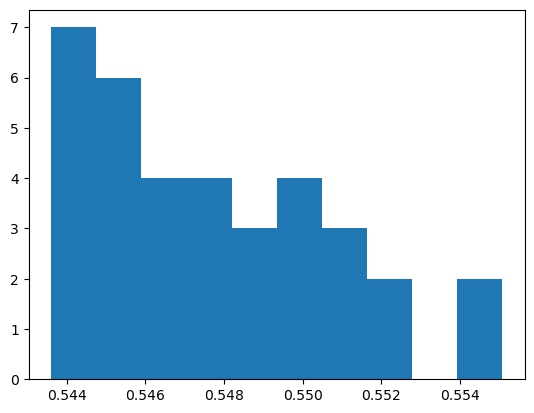

In [18]:
# >threshold parameters
threshold = np.nanpercentile(dfall['kge'].values, 95)
indices = np.where(dfall['kge'].values>=threshold)[0]
print(indices)
plt.hist(dfall['kge'].values[indices])
plt.show()

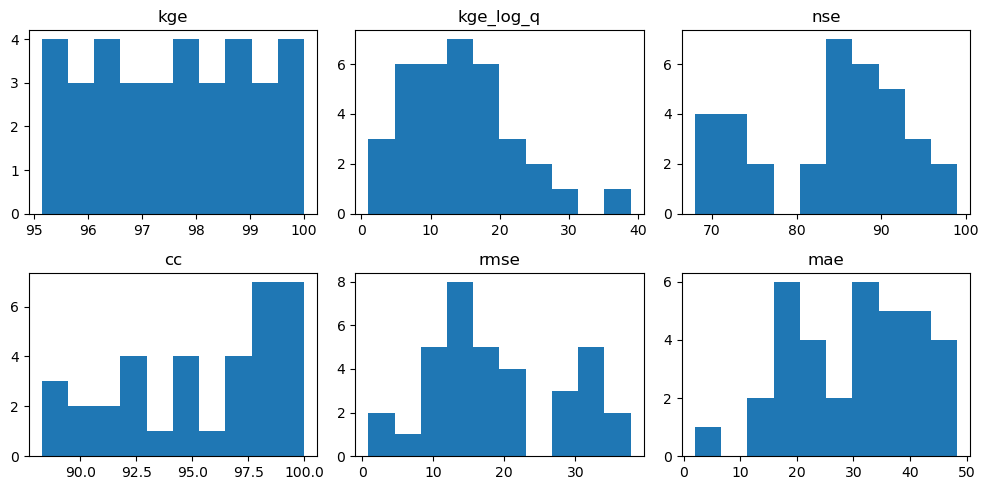

In [24]:
plotmet = ['kge','kge_log_q', 'nse', 'cc', 'rmse', 'mae', ]

fig = plt.figure(figsize=[10, 5])

for i in range(len(plotmet)):
    fig.add_subplot(2,3,i+1)
    met = plotmet[i]
    p = get_percentiles(dfall[met].values)
    plt.hist(p[indices])
    plt.title(met)

plt.tight_layout()
plt.show()

In [6]:
# run one selected parameter and archive

import os, sys, glob, subprocess, pathlib, random, time
import numpy as np
import pandas as pd
import xarray as xr

for tarbasin in range(627):

    selr = 1 # default is the best
    
    path_CTSM_base = f'/glade/work/guoqiang/CTSM_CAMELS/Calib_HH_MOASMO_bigrange/level1_{tarbasin}'
    
    caseflag = f'normKGEr{selr}'
    path_archive = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/LongTermSimu/LSEallbasin/level1_{tarbasin}/{caseflag}'
    
    # find a parameter set to run the model
    path0 = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange'
    dfall = pd.DataFrame()
    for iter in range(0, 4):
        filei = f'{path0}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter{iter}_many_metric.csv'
        dfi = pd.read_csv(filei)
        dfi['iter'] = iter
        dfi['trial'] = np.arange(len(dfi))
        dfall = pd.concat([dfall, dfi])
    
    # indi = np.nanargmax(dfall['kge'].values)
    tarmet = -dfall['kge'].values.copy()
    tarmet[np.isnan(tarmet)] = np.inf
    indexsort = np.argsort(tarmet)
    indi = indexsort[selr - 1]
    
    iter_tar = dfall['iter'].values[indi]
    trial_tar = dfall['trial'].values[indi]
    file_parameter_set = f'{path0}/level1_{tarbasin}_MOASMOcalib/param_sets_emutest/paramset_iter{iter_tar}_trial{trial_tar}.pkl'
    
    _ = subprocess.run(f'cp {file_parameter_set} {path_archive}', shell=True)
